<a href="https://colab.research.google.com/github/bilalboukerma/Transfer-Learning-Techniques-In-Images-Medical/blob/main/Extracting_Features_from_an_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python==3.4.2.16
!pip install opencv-python==3.4.2.16


In [ ]:
!pip uninstall opencv-python


Found existing installation: opencv-python 3.4.17.63
Uninstalling opencv-python-3.4.17.63:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-3.4.17.63.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Gui-ba0a2070.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5XcbQpa-ca221f44.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.

In [ ]:
!pip install opencv-python==3.4.17.63

  Using cached opencv_python-3.4.17.63-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (58.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

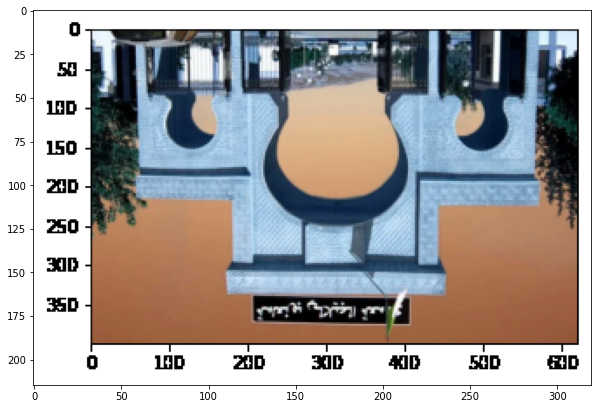

In [ ]:
uero = cv2.imread("90dg.png")
plt.figure(figsize=(10,10))
plt.imshow(uero)
plt.show()

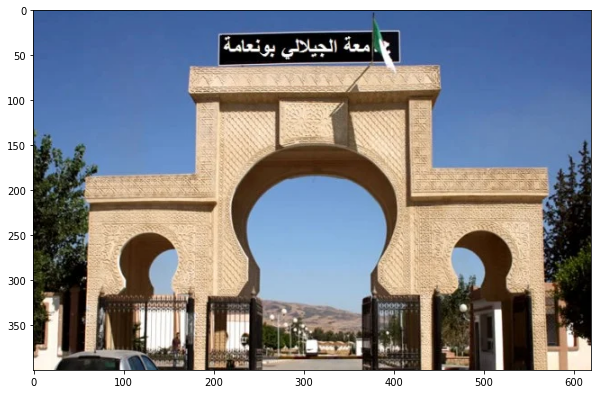

In [ ]:
ue = cv2.imread("University_entrance.jpg")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(ue, cv2.COLOR_BGR2RGB))
plt.show()

##Detecting the corners


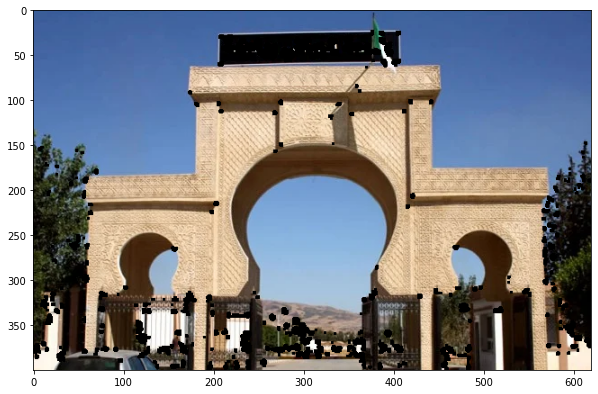

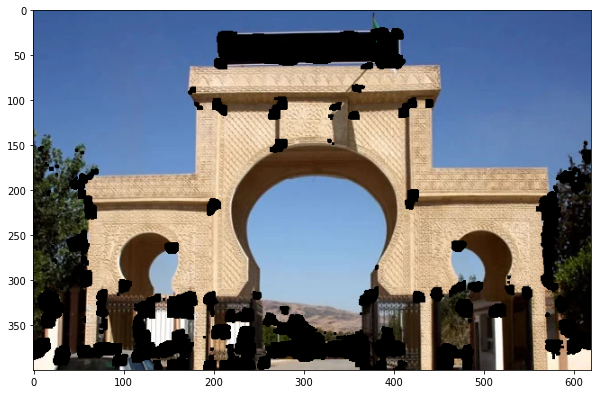

In [ ]:
img = ue.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
# To detect only sharp corners
dst = cv2.cornerHarris(gray, blockSize=4, ksize=5, k=0.04)
# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.01*dst.max()] = [0,0,0]
#cv2.imshow('Harris Corners(only sharp)',img)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
# to detect soft corners
dst = cv2.cornerHarris(gray, blockSize=14, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)
img[dst > 0.01*dst.max()] = [0,0,0]
#cv2.imshow('Harris Corners(also soft)',img)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

##Good features to track

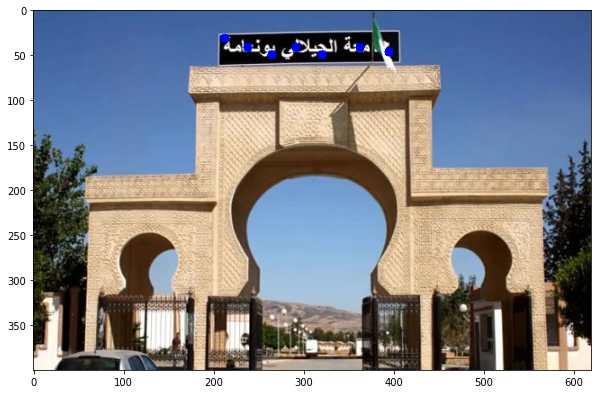

In [ ]:
im=ue.copy()
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, maxCorners=7, qualityLevel=0.05,
minDistance=25)
corners = np.float32(corners)
for item in corners:
 x, y = item[0]
 cv2.circle(im, (x,y), 5, 255, -1)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()


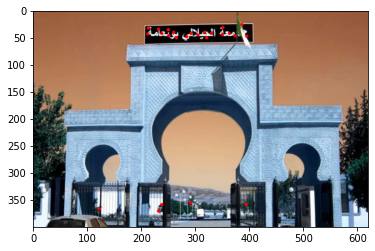

(<matplotlib.image.AxesImage at 0x7f839a3a9390>, None)

In [ ]:
im2=ue.copy()
gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(im2,(x,y),3,255,-1)
plt.imshow(im2),plt.show()

##Scale-invariant feature transform (SIFT)

this code work with 
print(cv2.__version__)
3.4.17

Number of Keypoints Detected In The Training Image:  1979
Number of Keypoints Detected In The Query Image:  231


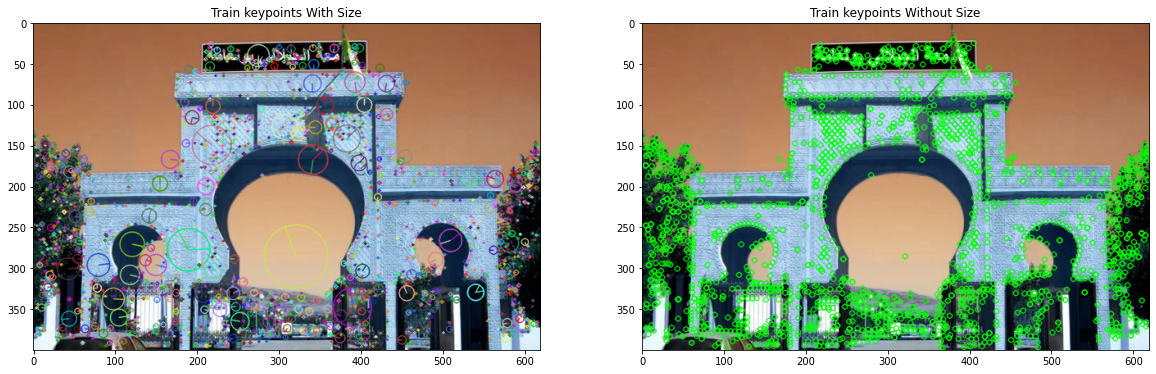

In [ ]:
training_image=ue.copy()
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_image, None)
test_keypoints, test_descriptor = sift.detectAndCompute(uero, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

In [ ]:
print(cv2.__version__)

3.4.17


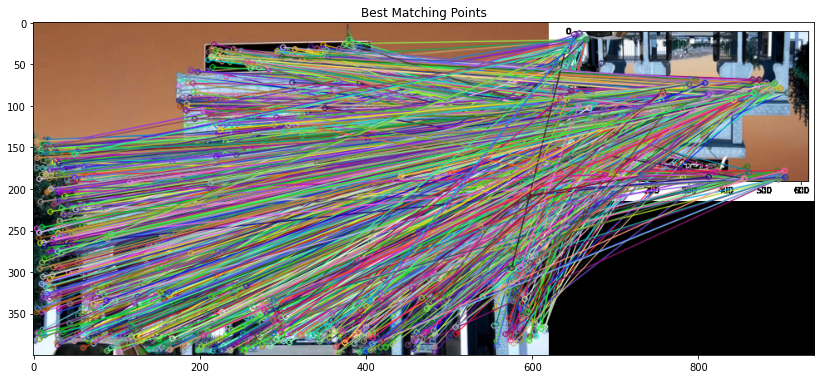


Number of Matching Keypoints Between The Training and Query Images:  1979


In [ ]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, uero, test_keypoints, matches, uero, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [ ]:
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

##Speeded-up robust features (SURF)

In [ ]:
input_image = ue.copy()# cv2.imread('images/fishing_house.jpg')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
# For version opencv < 3.0.0, use cv2.SURF()
surf = cv2.SURF_create()
# This threshold controls the number of keypoints
surf.setHessianThreshold(15000)
keypoints, descriptors = surf.detectAndCompute(gray_image, None)
cv2.drawKeypoints(input_image, keypoints, input_image, color=(0,255,0),\
flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

AttributeError: ignored

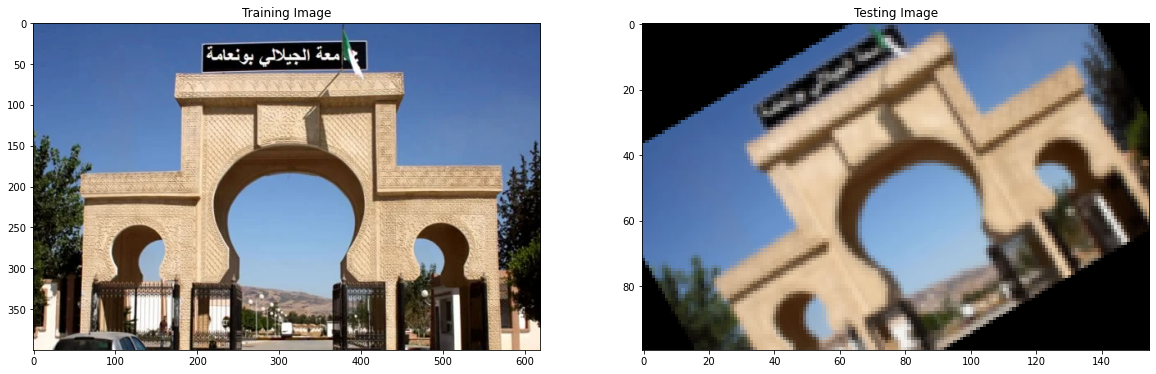

In [ ]:
# Convert the training image to RGB
training_image = cv2.cvtColor(ue.copy(), cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Detect keypoints and Create Descriptor


In [ ]:
#surf = cv2.xfeatures2d.SURF_create(800)
surf = cv2.FeatureDetector_create("SIFT")

train_keypoints, train_descriptor = surf.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = surf.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

AttributeError: ignored

##Features from accelerated segment test (FAST)


Number of keypoints with non max suppression: 7078


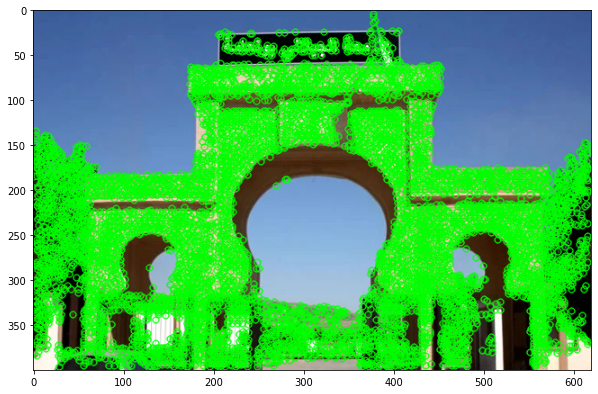

Total Keypoints without nonmaxSuppression: 25003


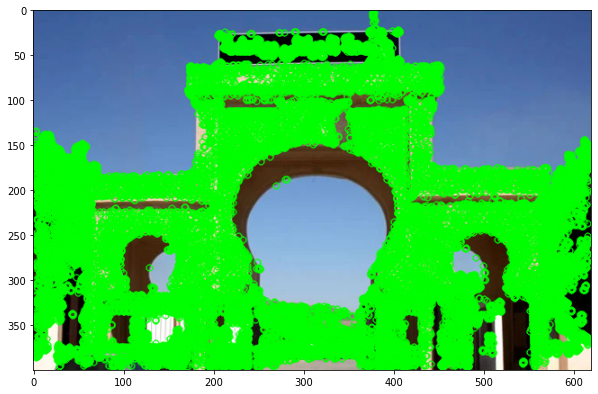

In [ ]:
input_image = ue.copy()
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
# Version under opencv 3.0.0 cv2.FastFeatureDetector()
fast = cv2.FastFeatureDetector_create()
# Detect keypoints
keypoints = fast.detect(gray_image, None)
print("Number of keypoints with non max suppression:", len(keypoints))
# Draw keypoints on top of the input image
img_keypoints_with_nonmax=input_image.copy()
cv2.drawKeypoints(input_image, keypoints, img_keypoints_with_nonmax,
color=(0,255,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_keypoints_with_nonmax, cv2.COLOR_BGR2RGB))
plt.show()
# Disable nonmaxSuppression
fast.setNonmaxSuppression(False)
# Detect keypoints again
keypoints = fast.detect(gray_image, None)
print("Total Keypoints without nonmaxSuppression:", len(keypoints))
# Draw keypoints on top of the input image
img_keypoints_without_nonmax=input_image.copy()
cv2.drawKeypoints(input_image, keypoints, img_keypoints_without_nonmax,
color=(0,255,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_keypoints_without_nonmax, cv2.COLOR_BGR2RGB))
plt.show()


##Binary robust independent elementary
features (BRIEF)


In [ ]:
input_image =ue.copy()
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
# Initiate FAST detector
fast = cv2.FastFeatureDetector_create()
# Initiate BRIEF extractor, before opencv 3.0.0 use
cv2.DescriptorExtractor_create("BRIEF")
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
keypoints = fast.detect(gray_image, None)
# compute the descriptors with BRIEF
keypoints, descriptors = brief.compute(gray_image, keypoints)
cv2.drawKeypoints(input_image, keypoints, input_image, color=(0,255,0))
#input_image
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()

AttributeError: ignored

##Oriented FAST and Rotated BRIEF (ORB)

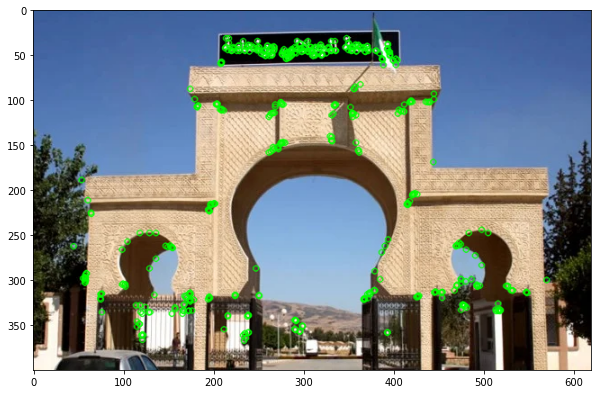

In [ ]:
import cv2
import numpy as np
input_image = ue.copy()
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
# Initiate ORB object, before opencv 3.0.0 use cv2.ORB()
orb = cv2.ORB_create()
# find the keypoints with ORB
keypoints = orb.detect(gray_image, None)
# compute the descriptors with ORB
keypoints, descriptors = orb.compute(gray_image, keypoints)
# draw only the location of the keypoints without size or orientation
cv2.drawKeypoints(input_image, keypoints, input_image, color=(0,255,0))
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()
